In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import plotly_express as px
import plotly.io as pio
from sklearn import preprocessing
import pandas_profiling
import datetime
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import warnings
import math
import plotly.express as px

warnings.filterwarnings("ignore")


In [6]:
df_count_day_type = pd.read_csv('./data_joao/df_count_day_type_modificado.csv',sep=",",parse_dates=['judgmentDate'])
df_count_week_day_type = pd.read_csv('./data_joao/df_count_week_day_type_modificado.csv',sep=",")
df_count_year_month_type = pd.read_csv('./data_joao/df_count_year_month_type_modificado.csv',sep=",")

df_count_day_type.index = pd.to_datetime(df_count_day_type['judgmentDate'])
df_count_year_month_type.index = pd.to_datetime(df_count_year_month_type['yearMonth'])
#df_count_week_day_type.index = pd.to_datetime(df_count_week_day_type['weekDay'])

del df_count_day_type['Unnamed: 0']
del df_count_week_day_type['Unnamed: 0']
del df_count_year_month_type['Unnamed: 0']
del df_count_day_type['judgmentDate']
del df_count_year_month_type['yearMonth']

dataFrames = [df_count_day_type,df_count_week_day_type,df_count_year_month_type]
for df in dataFrames:
    display(df.head(2))
    display(df.index)

,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-01-03,Agravo de Instrumento,2,0,DiaSemana,3,1,2000,False
2000-01-06,Agravo de Instrumento,1,3,DiaSemana,6,1,2000,False


DatetimeIndex(['2000-01-03', '2000-01-06', '2000-01-10', '2000-01-11',
               '2000-01-20', '2000-01-24', '2000-02-02', '2000-02-06',
               '2000-02-07', '2000-02-08',
               ...
               '2017-12-21', '2017-12-21', '2017-12-27', '2017-12-28',
               '2017-12-28', '2017-12-28', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='judgmentDate', length=63765, freq=None)

,weekDay,type,count
0,Sun,Ação Civil Pública,2
1,Sun,Ação Rescisória,9


RangeIndex(start=0, stop=513, step=1)

,type,count
yearMonth,,
2000-01-01,Agravo de Instrumento,12
2000-02-01,Ação Rescisória,1


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-02-01', '2000-02-01',
               '2000-02-01', '2000-02-01', '2000-02-01', '2000-02-01',
               '2000-02-01', '2000-02-01',
               ...
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01'],
              dtype='datetime64[ns]', name='yearMonth', length=7455, freq=None)


<div class="alert alert-info"><h1> FORECASTING
</h1>
    <hr/>
    <h3> 
</h3>
</div>

In [7]:
dfTypes = df_count_year_month_type['2000-01-01':].groupby('type').agg({'count':'sum'}).sort_values('count',ascending=False).reset_index()
display(dfTypes.head(3))
#print(dfTop10Types['type'])
dfTypes = dfTypes['type']
dfTypes

,type,count
0,Apelação Cível,1619859
1,Agravo de Instrumento,1367460
2,Embargos de Declaração,813282


0                           Apelação Cível
1                    Agravo de Instrumento
2                   Embargos de Declaração
3                            Recurso Cível
4                                   Agravo
                      ...                 
114                                Arresto
115    Declaração de Inconstitucionalidade
116                      Recurso de Agravo
117                               Oposição
118                 Arresto Hipoteca Legal
Name: type, Length: 119, dtype: object

In [8]:
df_YM_Forecast = df_count_year_month_type[df_count_year_month_type['type']=='Apelação Cível']
df_YM_Forecast = df_YM_Forecast[['type','count']]


df_day_Forecast = df_count_day_type[df_count_day_type['type']=='Apelação Cível']
df_day_Forecast = df_day_Forecast[['type','count']]

#df_Holt_day_Forecast = df_Holt_day[df_Holt_day['type']=='Apelação Cível']

#display(df_Holt_YM_Forecast.head(2))

In [9]:
df_YM_Forecast.dropna(inplace=True)
df_YM_Forecast.index.asfreq = 'A'
df_YM_Forecast.tail()


df_day_Forecast.fillna(0,inplace=True)
df_day_Forecast.index.asfreq = 'MS'
df_day_Forecast.tail()

df_YM_Forecast=df_YM_Forecast[['type','count']]
df_day_Forecast = df_day_Forecast[['type','count']]

In [10]:
print(df_YM_Forecast.count()['count'])
quantidade =df_YM_Forecast.count()['count']
percentForTesting = math.ceil((27*quantidade)/100)
percentageForTrain = math.floor(quantidade-percentForTesting)
print(percentForTesting)
print(percentageForTrain)

215
59
156


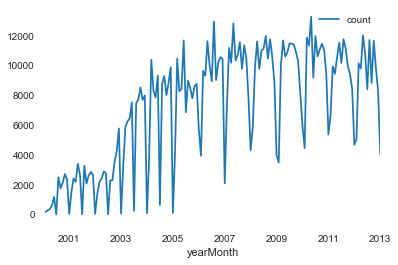

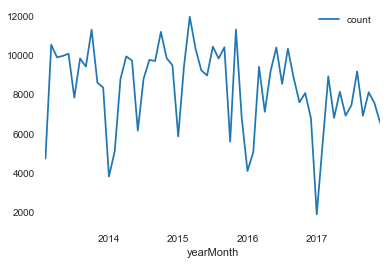

In [11]:
trainY = df_YM_Forecast.iloc[:percentageForTrain]
testY = df_YM_Forecast.iloc[percentageForTrain:]
trainY.plot(legend=True,label='Train');
testY.plot(legend=True,label='Test');

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
trainY = trainY[['count']]
testY = testY[['count']]

print('Treino')
display(trainY['count'].head(1))
display(trainY['count'].tail(1))

print('Teste')
display(testY['count'].head(1))
display(testY['count'].tail(1))

Treino


yearMonth
2000-02-01    151
Name: count, dtype: int64

yearMonth
2013-01-01    4051
Name: count, dtype: int64

Teste


yearMonth
2013-02-01    4725
Name: count, dtype: int64

yearMonth
2017-12-01    6546
Name: count, dtype: int64

Numero de predicoes 59


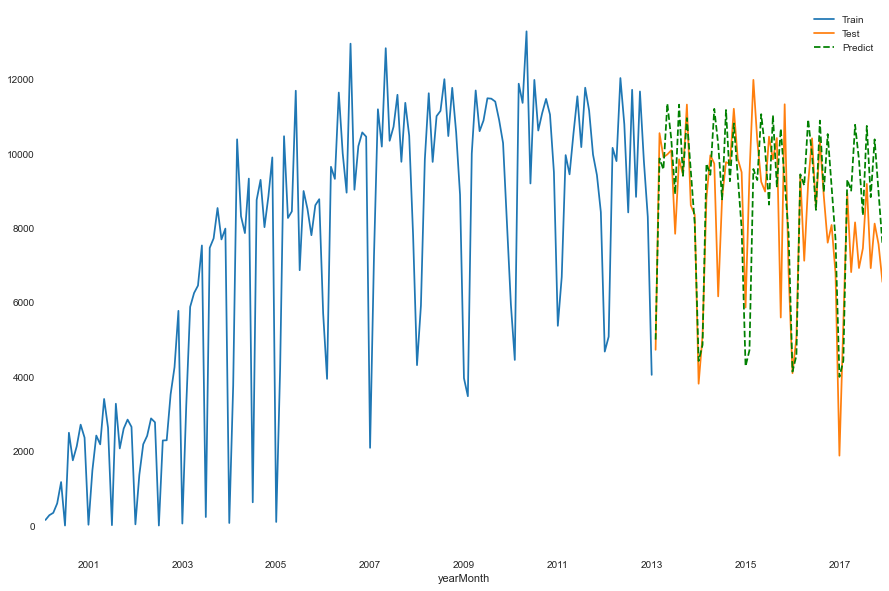

In [13]:
fittedModel = ExponentialSmoothing(trainY['count'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fittedModel.forecast(percentForTesting).rename('HW Forecast')

print('Numero de predicoes',test_predictions.count())
#display(test_predictions.head(1))
trainY['count'].plot(legend=True,label='Train',figsize=(15,10));
testY['count'].plot(legend=True,label='Test');
test_predictions.plot(color='green',linestyle='dashed',legend=True,label='Predict');

In [14]:
test_predictions = fittedModel.forecast(percentForTesting).rename('HW Forecast')
display(test_predictions.count())
display(test_predictions.head(1))

59

2013-02-01    4997.022075
Freq: MS, Name: HW Forecast, dtype: float64

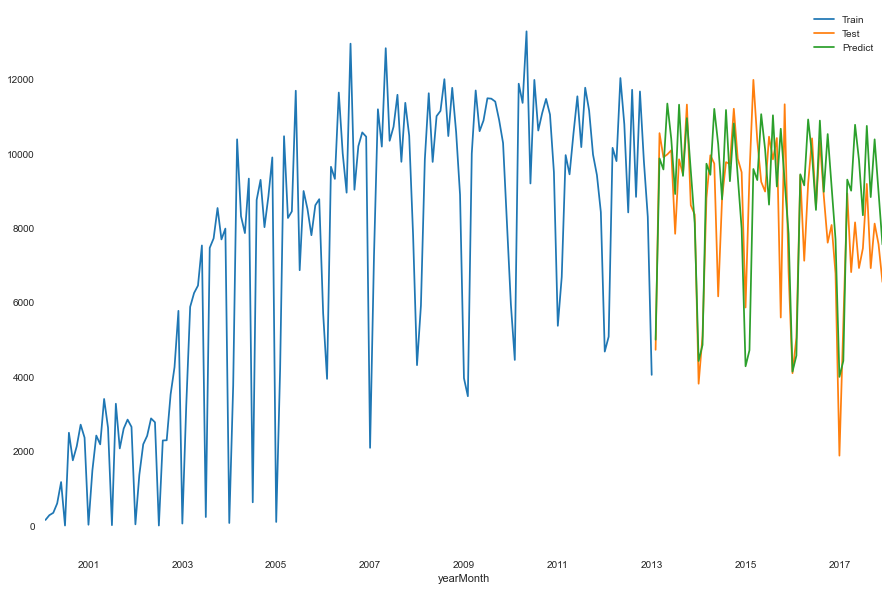

In [15]:
trainY['count'].plot(legend=True,label='Train',figsize=(15,10))
testY['count'].plot(legend=True,label='Test')
test_predictions.plot(legend=True,label='Predict');

In [16]:
display(testY.count())
display(test_predictions.count())

count    59
dtype: int64

59

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
display(testY.describe())

print('Mean Squared error:',mean_squared_error(testY,test_predictions))

test_predictions = fittedModel.forecast(percentForTesting)
print('Mean absolute error:',mean_absolute_error(testY,test_predictions))

print('Sqrt(mean absolute error):',np.sqrt(mean_absolute_error(testY,test_predictions)))

,count
count,59.000000
mean,8349.983051
std,2104.881572
min,1880.000000
25%,6919.500000
50%,8861.000000
75%,9850.500000
max,11977.000000


Mean Squared error: 2796231.3244948136
Mean absolute error: 1270.216993604008
Sqrt(mean absolute error): 35.64010372605568


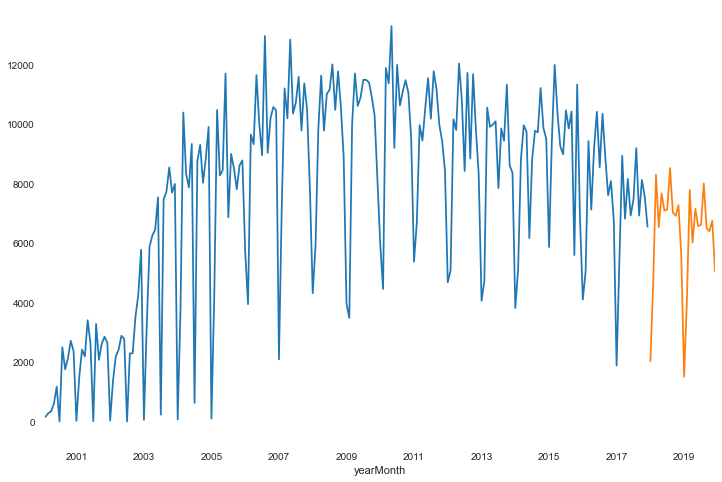

In [18]:
final_model = ExponentialSmoothing(df_YM_Forecast['count'],trend='add',seasonal='add',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(24)
df_YM_Forecast['count'].plot(figsize=(12,8))
forecast_predictions.plot()

In [19]:
from statsmodels.tsa.statespace.tools import diff

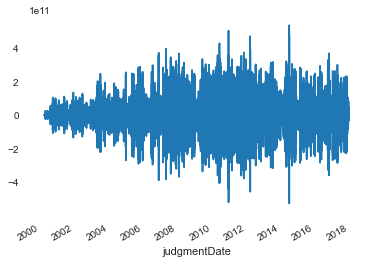

In [20]:
diff(df_day_Forecast['count'],k_diff=31).plot()

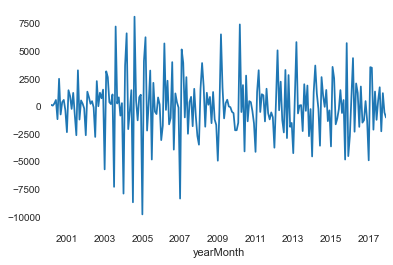

In [21]:
diff(df_YM_Forecast['count'],k_diff=1).plot()


<div class="alert alert-info"><h2> ACF e PACF
</h2>
    <hr/>
    
</div>

In [22]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [23]:
df_day_Agravo = df_count_day_type[df_count_day_type['type'] == 'Agravo de Instrumento']
df_day_Apelacao = df_count_day_type[df_count_day_type['type'] == 'Apelação Cível']

df_YM_Agravo = df_count_year_month_type[df_count_year_month_type['type'] == 'Agravo de Instrumento']
df_YM_Apelacao = df_count_year_month_type[df_count_year_month_type['type'] == 'Apelação Cível']


                  
display(df_day_Agravo.head(1))
display(df_day_Apelacao.head(1))

,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-01-03,Agravo de Instrumento,2,0,DiaSemana,3,1,2000,False


,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-02-06,Apelação Cível,1,6,FimSemana,6,2,2000,False


In [24]:
acf(df_day_Agravo['count'])[:3]

array([1.        , 0.53862853, 0.09008915])

In [25]:
print(pacf_yw(df_day_Agravo['count'], nlags=4,method='mle'))
print(pacf_ols(df_day_Agravo['count'], nlags=4))
#pacf_yw(df_day_Agravo['count'], nlags=4,method='unbiased')

[ 1.          0.53862853 -0.28178246 -0.16181341  0.16119608]
[ 1.          0.53870533 -0.28175263 -0.16181463  0.16125166]


In [26]:
from pandas.plotting import lag_plot

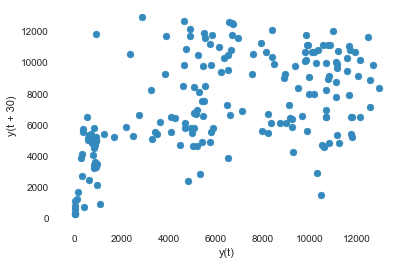

In [27]:
#lag_plot(df_day_Agravo['count'],lag=30)
lag_plot(df_YM_Agravo['count'],lag=30)

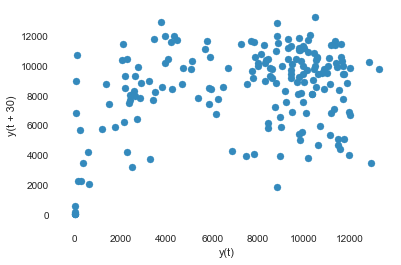

In [28]:
lag_plot(df_YM_Apelacao['count'],lag=30)

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

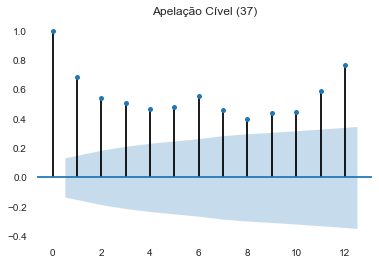

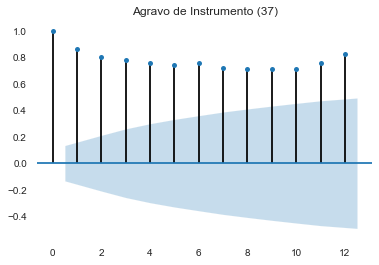

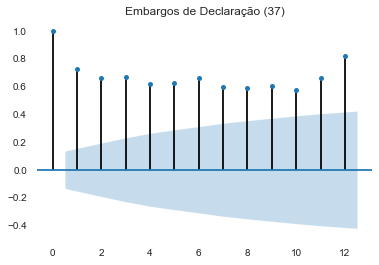

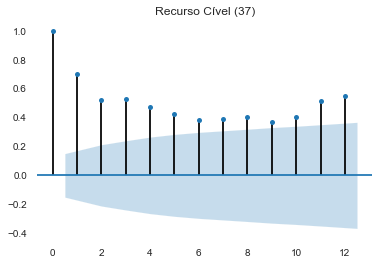

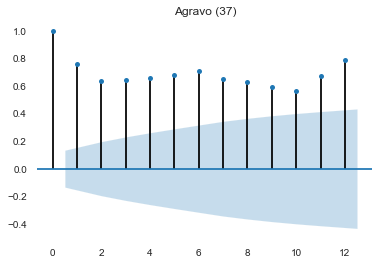

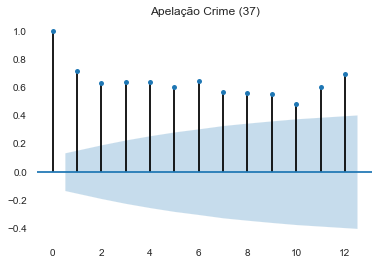

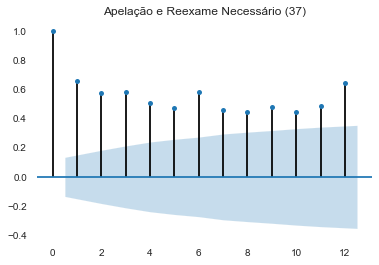

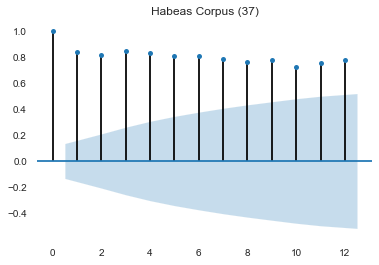

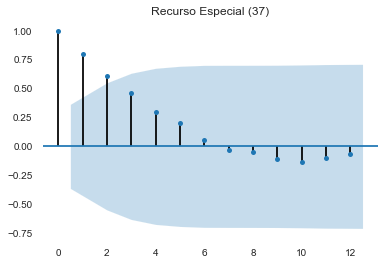

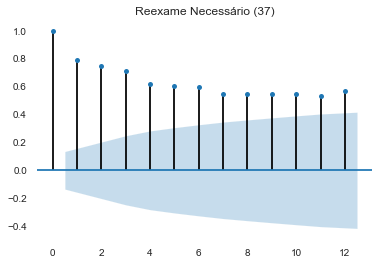

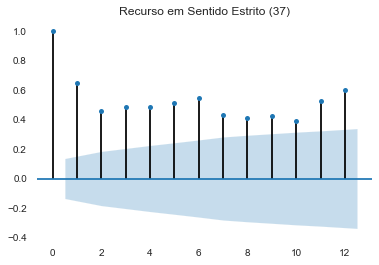

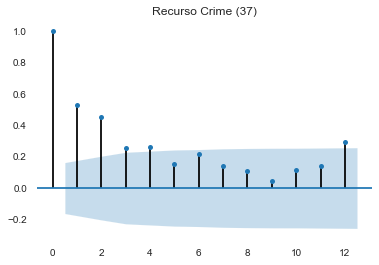

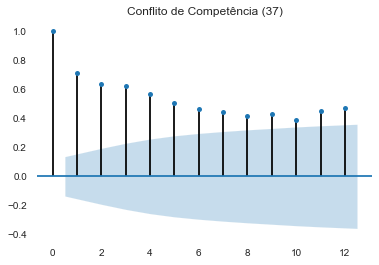

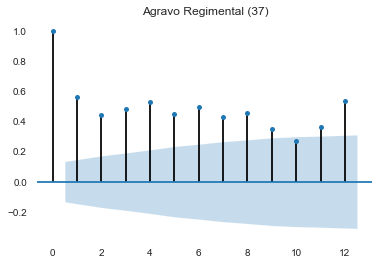

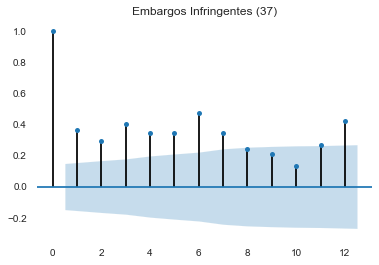

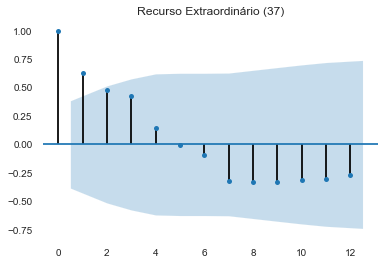

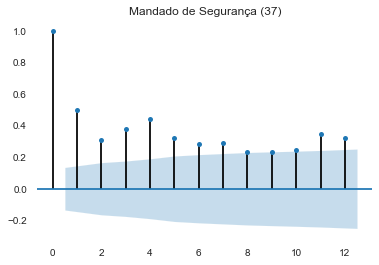

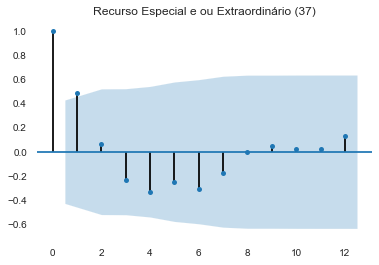

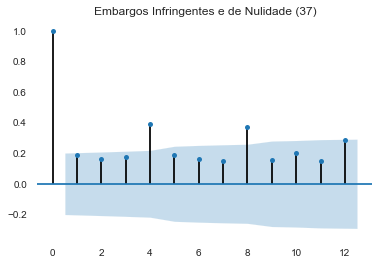

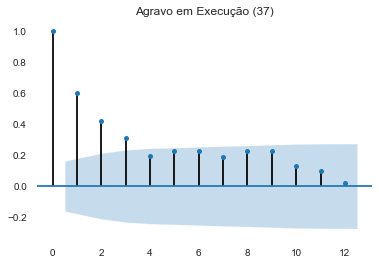

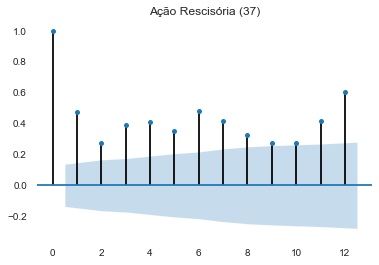

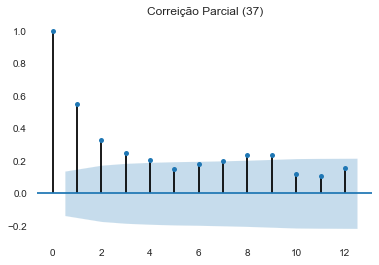

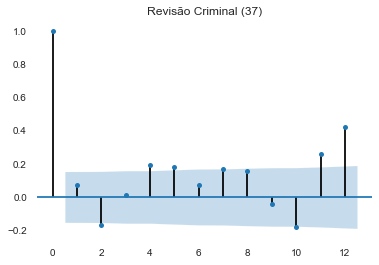

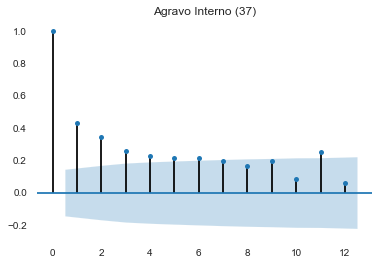

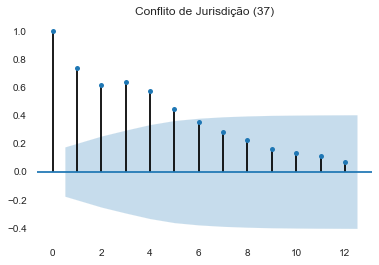

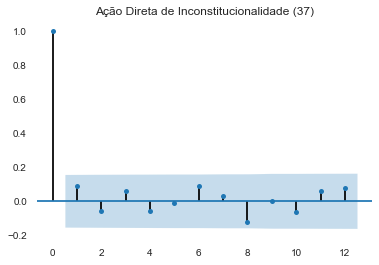

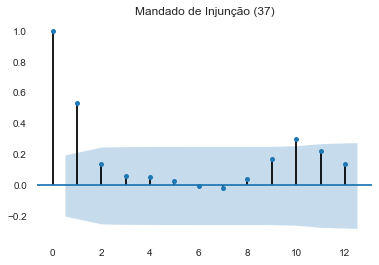

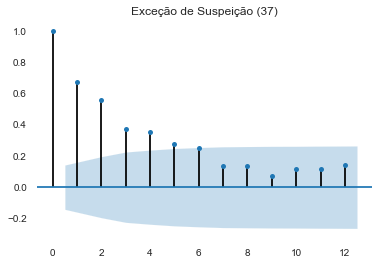

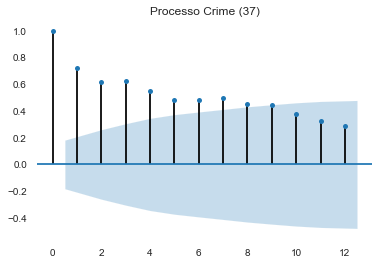

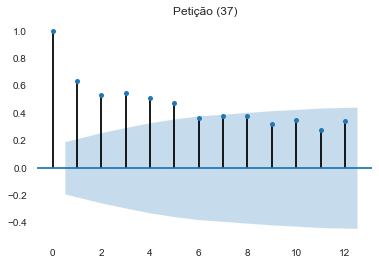

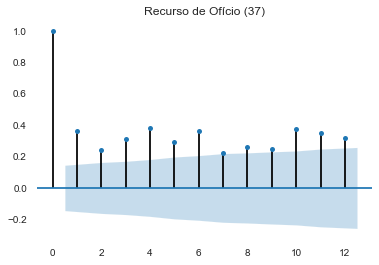

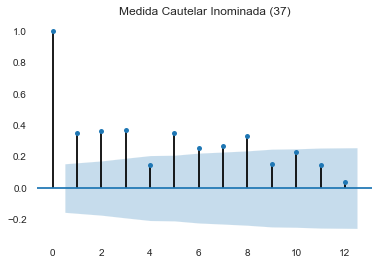

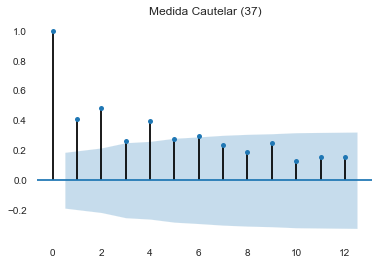

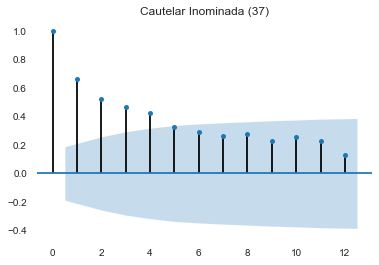

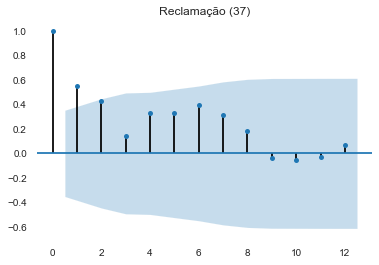

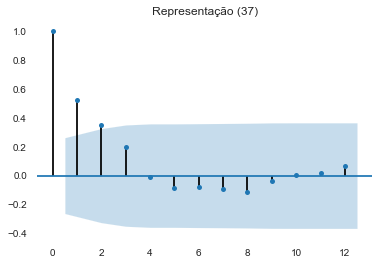

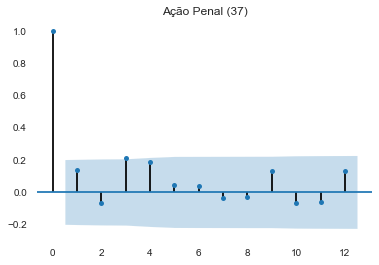

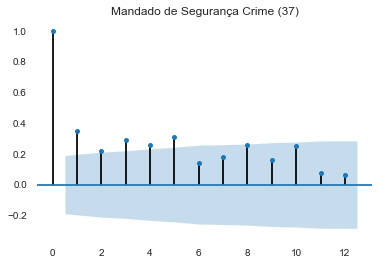

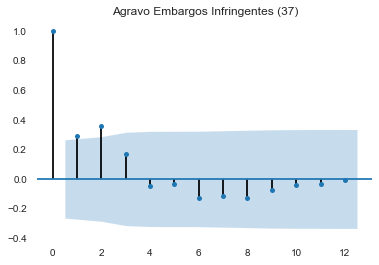

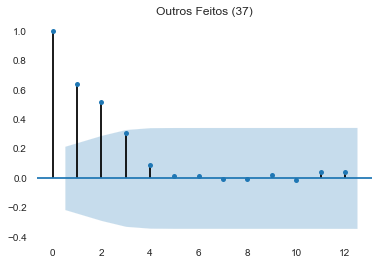

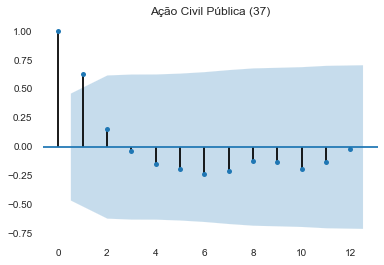

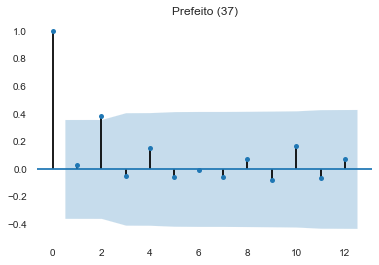

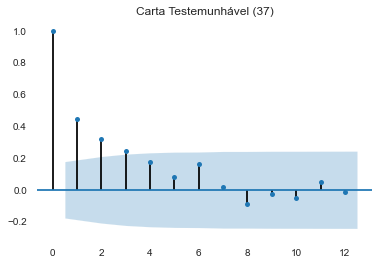

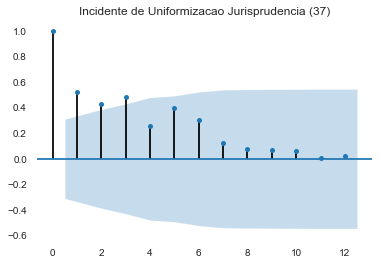

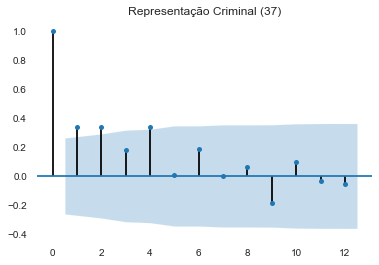

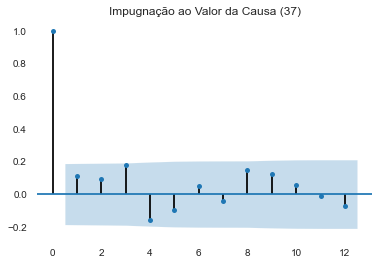

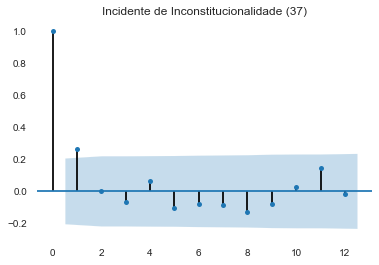

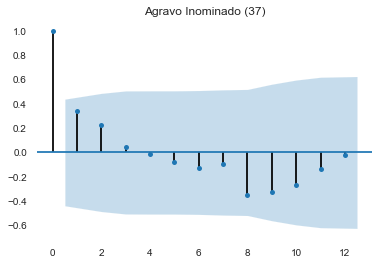

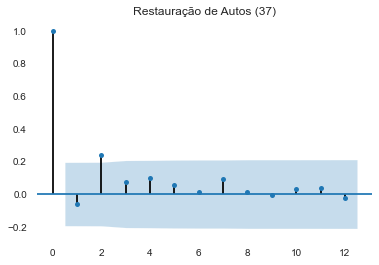

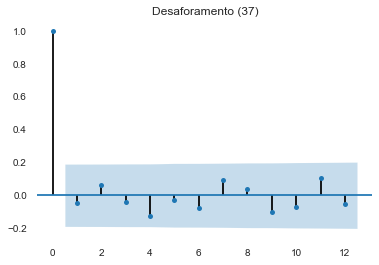

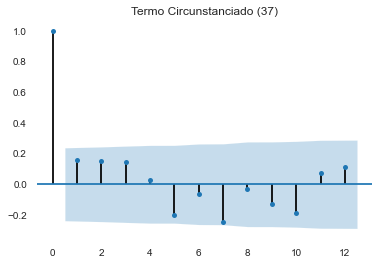

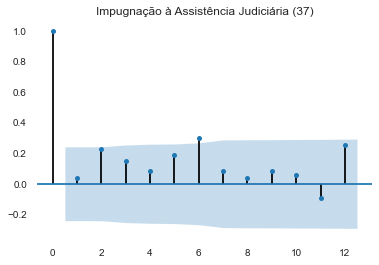

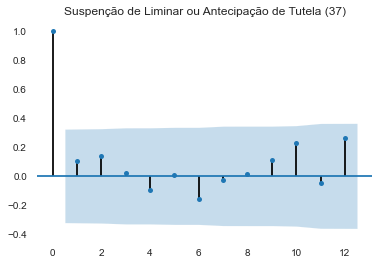

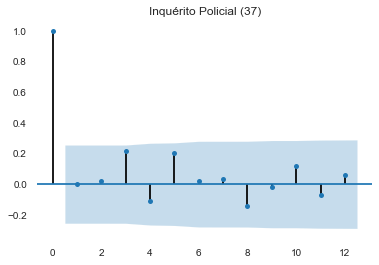

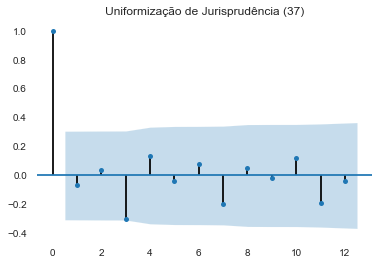

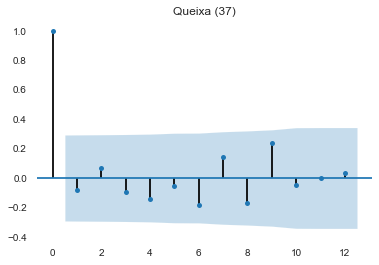

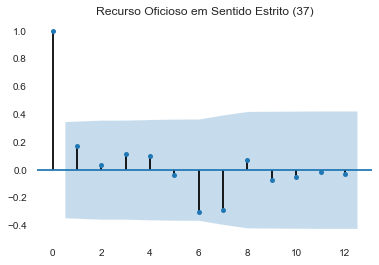

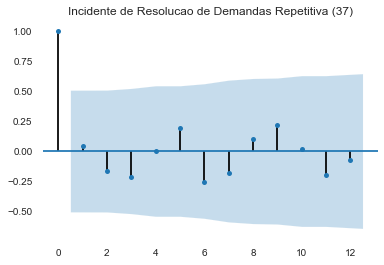

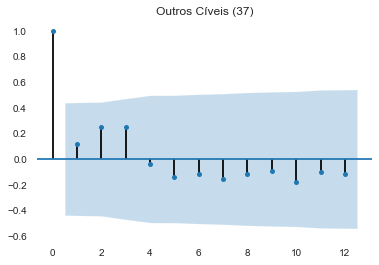

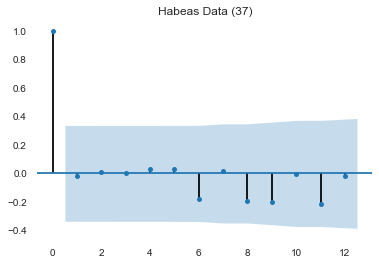

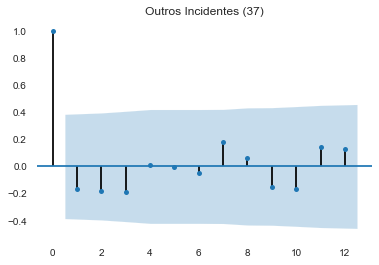

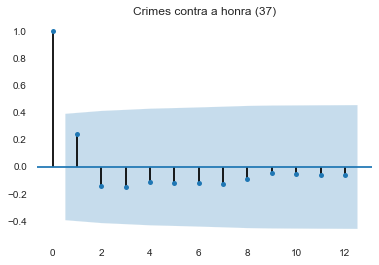

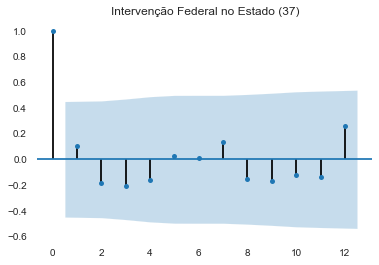

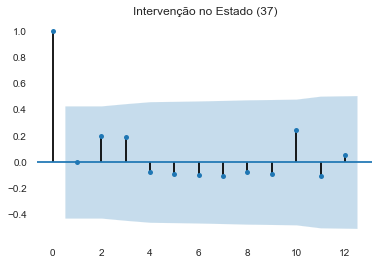

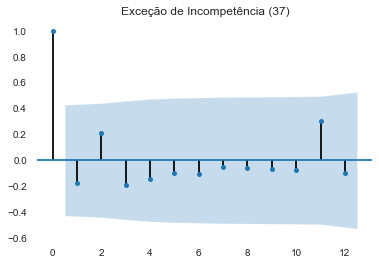

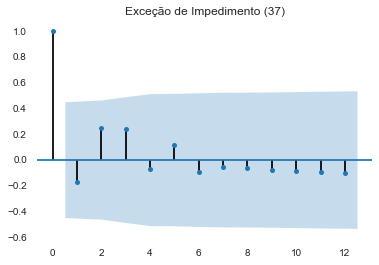

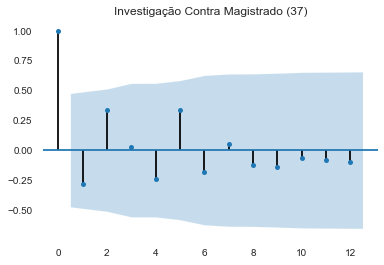

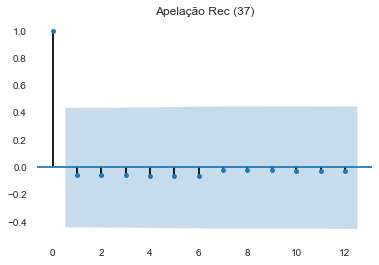

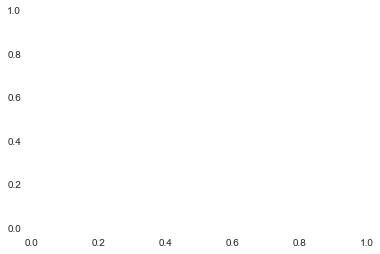

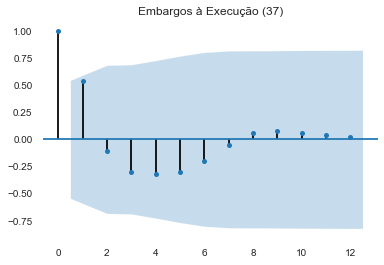

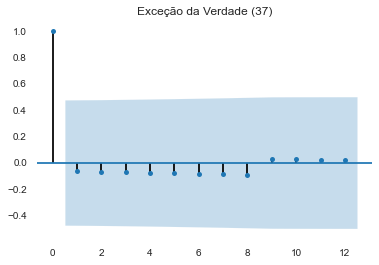

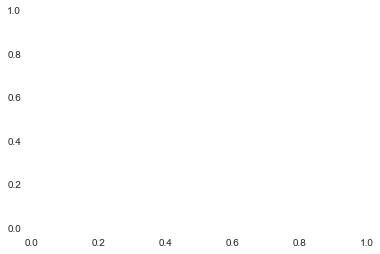

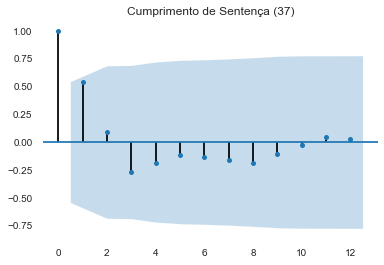

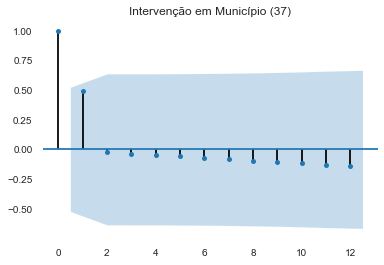

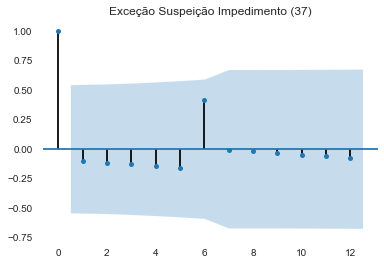

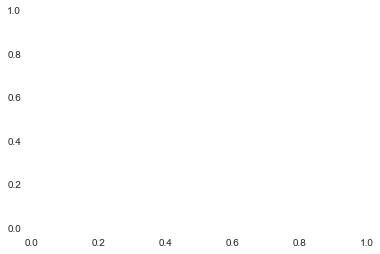

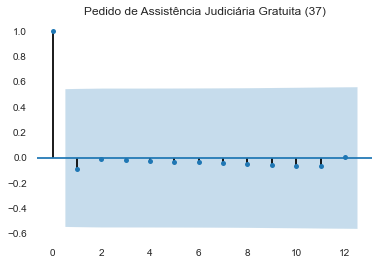

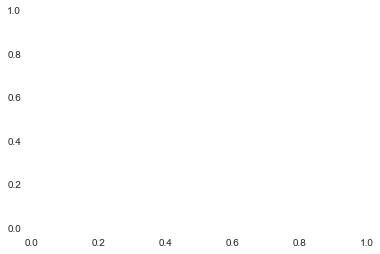

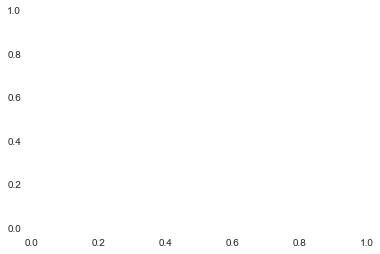

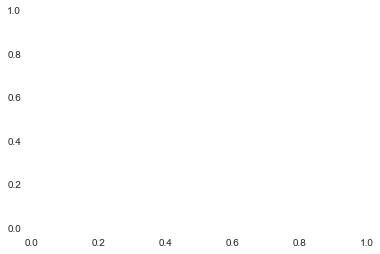

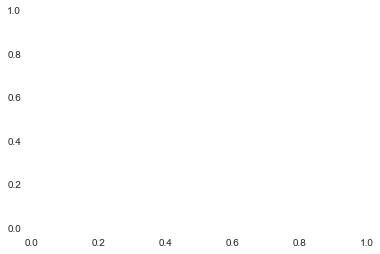

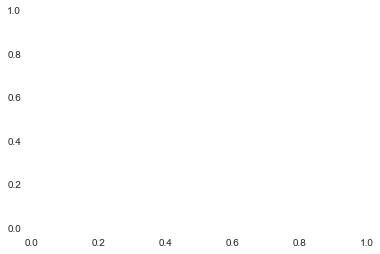

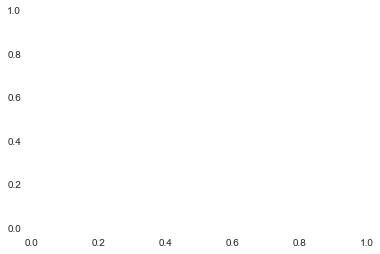

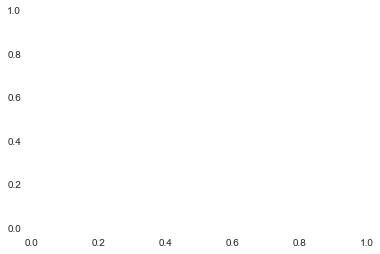

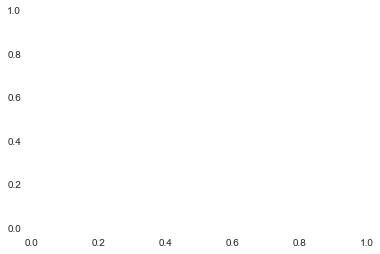

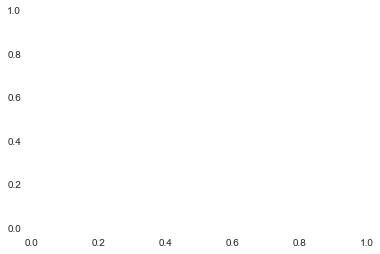

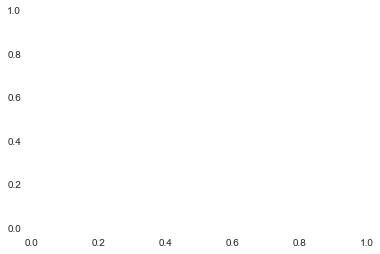

In [30]:
for i in dfTypes.unique():    
    df_testing = df_count_year_month_type[df_count_year_month_type['type'] == i]
    try: 
        a = len(pacf_yw(df_testing['count'], nlags=36,method='mle'))
        name = i +' ('+ str(a) +')'
        #print(name)
        plot_acf(df_testing['count'],lags=12,title=name); 
    except: 
        a=1
        #print('erro no ',name)
        



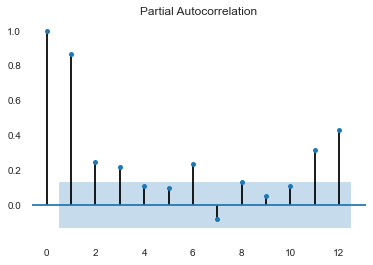

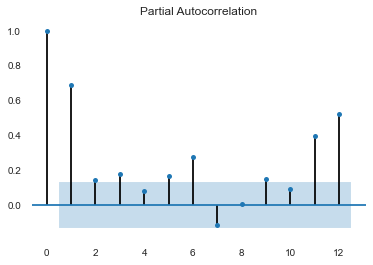

In [31]:
plot_pacf(df_YM_Agravo['count'],lags=12);
plot_pacf(df_YM_Apelacao['count'],lags=12);


<div class="alert alert-info"><h2> ARIMA
</h2>
    <hr/>
    
</div>

In [32]:
from statsmodels.tsa.ar_model  import AR, ARResults

In [33]:
for i in dfTypes.unique()[0:3]:    
    df_count_year_month_type[df_count_year_month_type['type'] == i]
    print(i)


dfYM = df_count_year_month_type[df_count_year_month_type['type'] == 'Apelação Cível']


Apelação Cível
Agravo de Instrumento
Embargos de Declaração


In [34]:
tamanhoDataSet =len(dfYM['count'])
refTeste = (len(dfYM['count'])*(1/10))*3
refTreino = tamanhoDataSet-refTeste
print(tamanhoDataSet,refTeste,refTreino)

215 64.5 150.5


In [35]:
trainYM = dfYM.iloc[:150]
testYM = dfYM.iloc[150:]

const       1666.101757
L1.count       0.142465
L2.count       0.008085
dtype: float64
const       1666.101757
L1.count       0.142465
L2.count       0.008085
dtype: float64
const       1666.101757
L1.count       0.142465
L2.count       0.008085
dtype: float64
6004648.174271077
6004648.174271077
6004648.174271077


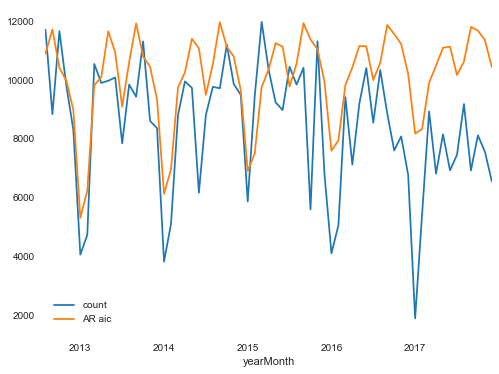

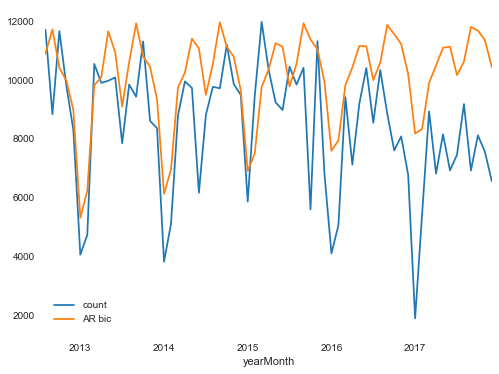

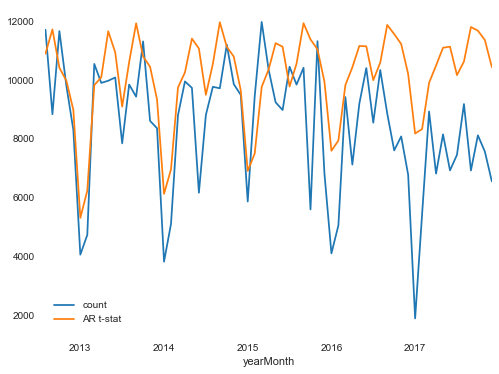

In [36]:
from sklearn.metrics import mean_squared_error
predictionsArr = []
ic = ['aic','bic','t-stat']

for icItem in ic:    
    model = AR(trainYM['count'])
    AR1fit = model.fit(ic=icItem) #max_lag=12
    #AR1fit = model.fit(max_lag=icItem)
    print(AR1fit.params[0:3])
    start = len(trainYM)
    end = len(trainYM) + len(testYM)-1
    trainYM.index.freq = 'MS'
    testYM.index.freq = 'MS'
    predictionsYM = AR1fit.predict(start=start,end=end)
    predictionsYM = predictionsYM.rename('AR '+ str(icItem))
    predictionsArr.append(predictionsYM)
    
for pred in predictionsArr:
    testYM.plot(figsize=(8,6), legend=True)
    pred.plot(legend=True);
    error = mean_squared_error(testYM['count'],pred)
    print(error)
    


In [37]:
#FORECASTING
model = AR(dfYM['count'])
ARfit = model.fit()
forecasted_values = ARfit.predict(start=len(dfYM),end=len(dfYM)+24).rename('Forecast')

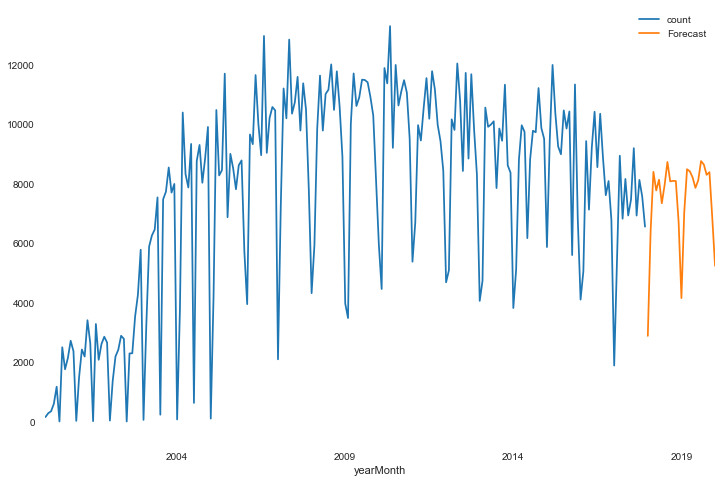

In [38]:
dfYM['count'].plot(figsize=(12,8),legend=True)
forecasted_values.plot(legend=True)


<div class="alert alert-warning"><span> Precisa-se entender os dados.<br>
        Saber tendencia, estacionariedade (Um processo estacionário tem a propriedade de que a média, variância e estrutura de autocorrelação não mudam no decorrer do tempo.)<br>
    Para fazer isso matematicamente usa-se Dickey-Fuller test. <br>
    Se p-value for menor do que "<" 0.05 rejeita-se a hipotese nula e assume que o data set é estacionário.
    </span>
    <hr/>
    
</div>


<div class="alert alert-warning"><span> Granger Causality Test<br>
        Testa se o teste de hipotese para determina se uma serie temporal é util em prever outra. Também conhecida como Causalidade. 
           </span>    
    <p>Outros itens para avaliar predição já vistos:</p>
    <ul>
        <li>MAE - mean average error</li>
        <li>MSE - mean squared error</li>
        <li>RMSE -  root mean squared error</li>
    </ul>
    <hr/>
    <p>ainda não vistos:</p>
    <ul>
        <li>AIC - akaike</li>
        <ul><li>Muito usado, ele ajuda a medir a eficiência de modelos. Modelos mais complexos que possuem infimo ganho e utilizam muitos parâmetros e não dao retorno esperado são penalizados. </li></ul>
        <li>BIC - Bayes
             <ul><li>Parecido com Akaike utiliza apenas uma matematica bayesiana como diferencial </li></ul>
        </li>        
    </ul>
    
</div>

In [39]:
dfYM = df_count_year_month_type[df_count_year_month_type['type'] == 'Apelação Cível']

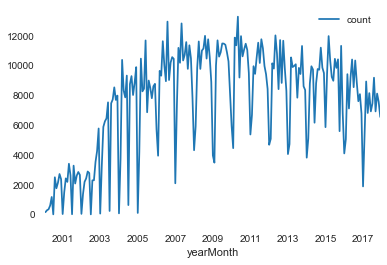

In [40]:
dfYM.plot()

In [41]:
from statsmodels.tsa.stattools import adfuller

## Funcionamento adfuler

In [42]:
dfTest =  adfuller(dfYM['count'])
dfout = pd.Series(dfTest[0:4],index=['ADF Test Statistics','p-value','#Lags used','#observations'])

for key,val in dfTest[4].items():
    dfout[f'critical value ({key})'] = val
display(pd.DataFrame(dfout))

,0
ADF Test Statistics,-2.433313
p-value,0.132554
#Lags used,14.000000
#observations,200.000000
critical value (1%),-3.463476
critical value (5%),-2.876102
critical value (10%),-2.574532


In [259]:
from statsmodels.tsa.stattools import adfuller

def adf_teste(series,title='',prints=False):    
    summay = ''
    if prints:
        print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC',) 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():        
        out[f'critical value ({key})']=val
        
    if prints:
        display(pd.DataFrame(out))
    
    
    
    if result[1] <= 0.05:
        summary = "Strong evidence against the null hypothesis \n Reject the null hypothesis \n Data has no unit root and is stationary"
        if prints:
            print("Strong evidence against the null hypothesis")
            print("Reject the null hypothesis")
            print("Data has no unit root and is stationary")        
    else:
        summary = "Weak evidence against the null hypothesis \n Fail to reject the null hypothesis \n Data has a unit root and is non-stationary"
        if prints:
            print("Weak evidence against the null hypothesis")
            print("Fail to reject the null hypothesis")
            print("Data has a unit root and is non-stationary")
            
    
    return(result[1],title,result[0],result[2],result[3],result[4],result[5],summary) 

In [260]:
adf_teste(dfYM['count'])

(0.1325539922945616,
 '',
 -2.4333127419464113,
 14,
 200,
 {'1%': -3.463476079125, '5%': -2.876102355, '10%': -2.574532225},
 3512.9608061163153,
 'Weak evidence against the null hypothesis \n Fail to reject the null hypothesis \n Data has a unit root and is non-stationary')

In [261]:
#teste de como pegar apenas o item pra funçao abaixo
#df_count_year_month_type[df_count_year_month_type['type']=='Agravo'].groupby(['type']).agg(total=('count','sum')).reset_index()['total'].item()

In [262]:
dicionario = []
for i in dfTypes.unique():    
    try:
        dfToTest = df_count_year_month_type[df_count_year_month_type['type'] == i]
        quantidadeAmostras = df_count_year_month_type[df_count_year_month_type['type']==i].groupby(['type']).agg(total=('count','sum')).reset_index()['total'].item()
        #quantidadeAmostras = dfToTest.groupby('type').agg({'sum':'count'})['count']
        #print(quantidadeAmostras)
        pvalue, titulo,adf,lags,observ,criticals,_,resumo = adf_teste(dfToTest['count'],i)
        criticidade = ''
        for key,val in criticals.items():        
            #out[f'critical value ({key})']=val
            criticidade = criticidade + ' | ' + key + ':' + str(val)
        nomeGraph = titulo + '(' + str(quantidadeAmostras) +')'                
        dicionario.append({'titulo':nomeGraph,'p-value':pvalue,'QtdItens':quantidadeAmostras,
                           'adf':adf,'lags':lags,'observ':observ,'criticals':criticidade,'resumo':resumo })
    except ValueError:
        print('ValueError erro em ',i)
    except:
        print('erro em ',i)
    #print(pvalue,titulo)
    
dfResultPvalue = pd.DataFrame(dicionario).reset_index()
print(dfResultPvalue.columns)

ValueError erro em  Processo de Execução
ValueError erro em  Impugnação ao Cumprimento de Sentença
ValueError erro em  Impugnação
ValueError erro em  Suspensão de Execução de Sentença
ValueError erro em  Medidas Protetivas de Urgencia
ValueError erro em  Incidente de Assunção de Competência
ValueError erro em  Pedido Suspensão Liminar
ValueError erro em  Cautelar Incidental
ValueError erro em  Recurso Inominado
ValueError erro em  Embargos de Terceiros
ValueError erro em  Declaratória de Constitucionalidade
ValueError erro em  Crime Responsabilidade Funcionário Publico
ValueError erro em  Agravo em Rec
ValueError erro em  Liquidação Provisória por Artigos
ValueError erro em  Pedido de Arquivamento
ValueError erro em  Interpelação Judicial
ValueError erro em  Embargos
ValueError erro em  Incidente de Prevenção ou Composição de Divergência
ValueError erro em  Interpelação
ValueError erro em  Agravo de Instrumento em Recurso Extraordinario
ValueError erro em  Outras Medidas Provisionais
V


<div class="alert alert-info"><h1>Grafico P-value, por quantidade de processos por tipo de processo </h1>
    <hr/>
    
</div>

In [269]:
fig = px.scatter(dfResultPvalue[dfResultPvalue['observ']>100],'titulo','p-value',color='QtdItens',hover_data=['QtdItens', 'adf', 'lags', 'observ',
       'criticals','resumo'])
fig.show()

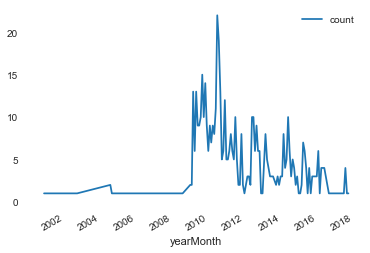

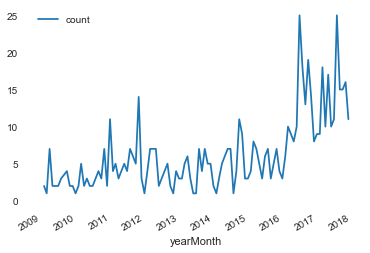

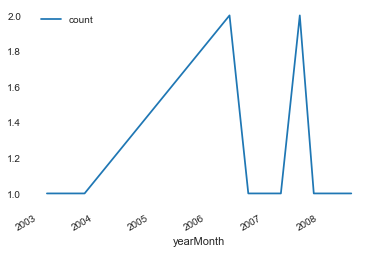

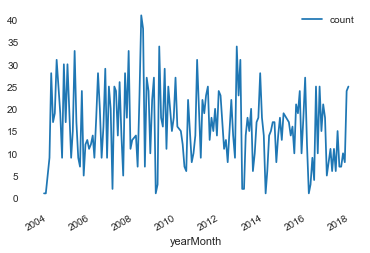

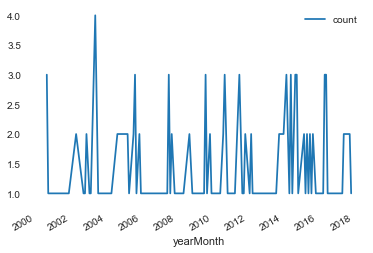

In [210]:
df_count_year_month_type[df_count_year_month_type['type']=='Cautelar Inominada'].plot() #P-value 0.00712
df_count_year_month_type[df_count_year_month_type['type']=='Petição'].plot() #P-value = 0.96 
df_count_year_month_type[df_count_year_month_type['type']=='Apelação Recurso de Ofício'].plot() 
df_count_year_month_type[df_count_year_month_type['type']=='Ação Direta de Inconstitucionalidade'].plot() #P-value = 0.96 
df_count_year_month_type[df_count_year_month_type['type']=='Desaforamento'].plot()


#pq a de cima o P-value foi tao baixo, pode ser interpretado só olhando o grafico?


<div class="alert alert-info"><h1>Grafico ADF por quantidade de processos por tipo de processo (verificar estacionariedade) </h1>
    <hr/>
    
</div>

In [268]:
#precisa haver mais de 100 observaçoes ...
fig = px.scatter(dfResultPvalue[dfResultPvalue['observ']>100],'titulo','adf',color='QtdItens',hover_data=['p-value','QtdItens', 'adf', 'lags', 'observ',
       'criticals','resumo'])
fig.show()



<div class="alert alert-info"><h2> Grangercausalitytests
</h2>
        <hr/>
    
</div>

In [88]:
from statsmodels.tsa.stattools import grangercausalitytests

Ação Rescisória


In [116]:
dfAPAG = df_count_year_month_type[(df_count_year_month_type['type'] == 'Apelação e Reexame Necessário') | (df_count_year_month_type['type'] == 'Agravo Regimental')
                                 | (df_count_year_month_type['type'] == 'Ação Rescisória') 
                                  | (df_count_year_month_type['type'] == 'Mandado de Segurança')]


In [117]:
import plotly.express as px
fig = px.line(dfAPAG.reset_index(), x='yearMonth', y='count', color='type')
fig.show()

In [118]:
dfAPAGPivot = dfAPAG.pivot(columns='type', values='count').reset_index().fillna(0)

In [119]:
grangercausalitytests(dfAPAGPivot[['Apelação e Reexame Necessário','Agravo Regimental']],maxlag=36)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2336  , p=0.6294  , df_denom=211, df_num=1
ssr based chi2 test:   chi2=0.2369  , p=0.6264  , df=1
likelihood ratio test: chi2=0.2368  , p=0.6265  , df=1
parameter F test:         F=0.2336  , p=0.6294  , df_denom=211, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5053  , p=0.6041  , df_denom=208, df_num=2
ssr based chi2 test:   chi2=1.0348  , p=0.5961  , df=2
likelihood ratio test: chi2=1.0323  , p=0.5968  , df=2
parameter F test:         F=0.5053  , p=0.6041  , df_denom=208, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9990  , p=0.3943  , df_denom=205, df_num=3
ssr based chi2 test:   chi2=3.0994  , p=0.3766  , df=3
likelihood ratio test: chi2=3.0770  , p=0.3799  , df=3
parameter F test:         F=0.9990  , p=0.3943  , df_denom=205, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7565  , p=0.5548  

parameter F test:         F=1.5756  , p=0.0420  , df_denom=118, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=1.4623  , p=0.0731  , df_denom=115, df_num=33
ssr based chi2 test:   chi2=76.3728 , p=0.0000  , df=33
likelihood ratio test: chi2=63.7722 , p=0.0010  , df=33
parameter F test:         F=1.4623  , p=0.0731  , df_denom=115, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=1.4130  , p=0.0918  , df_denom=112, df_num=34
ssr based chi2 test:   chi2=77.6417 , p=0.0000  , df=34
likelihood ratio test: chi2=64.6073 , p=0.0012  , df=34
parameter F test:         F=1.4130  , p=0.0918  , df_denom=112, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=1.4767  , p=0.0661  , df_denom=109, df_num=35
ssr based chi2 test:   chi2=85.3491 , p=0.0000  , df=35
likelihood ratio test: chi2=69.8561 , p=0.0004  , df=35
parameter F test:         F=1.4767  , p=0.0661  , df_denom=109, df_num=35

Gran

{1: ({'ssr_ftest': (0.23362350057396078, 0.6293511558955586, 211.0, 1),
   'ssr_chi2test': (0.23694516171956215, 0.6264212386741916, 1),
   'lrtest': (0.23681408320953778, 0.6265166807682031, 1),
   'params_ftest': (0.23362350057357142, 0.6293511558958511, 211.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5052573973956678, 0.6040888276741256, 208.0, 2),
   'ssr_chi2test': (1.0348060158199734, 0.5960665196999166, 2),
   'lrtest': (1.0323004574538572, 0.5968137273728976, 2),
   'params_ftest': (0.5052573973945994, 0.6040888276747706, 208.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9990234785520042, 0.3943146468059563, 205.0, 3),
   'ssr_chi2test': (3.0994094261418277, 0.37655070311690786, 3),
   'lrtest': (3.0769713961894922, 0.3799092805128303, 3),
   'params_ftest': (0.9990234785519904, 0.3943146468059603, 205.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [120]:
grangercausalitytests(dfAPAGPivot[['Agravo Regimental','Mandado de Segurança']],maxlag=36)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.2765  , p=0.0130  , df_denom=211, df_num=1
ssr based chi2 test:   chi2=6.3657  , p=0.0116  , df=1
likelihood ratio test: chi2=6.2729  , p=0.0123  , df=1
parameter F test:         F=6.2765  , p=0.0130  , df_denom=211, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.1459  , p=0.0002  , df_denom=208, df_num=2
ssr based chi2 test:   chi2=18.7316 , p=0.0001  , df=2
likelihood ratio test: chi2=17.9533 , p=0.0001  , df=2
parameter F test:         F=9.1459  , p=0.0002  , df_denom=208, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.9734  , p=0.0006  , df_denom=205, df_num=3
ssr based chi2 test:   chi2=18.5321 , p=0.0003  , df=3
likelihood ratio test: chi2=17.7664 , p=0.0005  , df=3
parameter F test:         F=5.9734  , p=0.0006  , df_denom=205, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.3016  , p=0.0023  

ssr based F test:         F=1.4935  , p=0.0626  , df_denom=115, df_num=33
ssr based chi2 test:   chi2=77.9986 , p=0.0000  , df=33
likelihood ratio test: chi2=64.9138 , p=0.0008  , df=33
parameter F test:         F=1.4935  , p=0.0626  , df_denom=115, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=1.4431  , p=0.0792  , df_denom=112, df_num=34
ssr based chi2 test:   chi2=79.2933 , p=0.0000  , df=34
likelihood ratio test: chi2=65.7595 , p=0.0009  , df=34
parameter F test:         F=1.4431  , p=0.0792  , df_denom=112, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=1.3994  , p=0.0970  , df_denom=109, df_num=35
ssr based chi2 test:   chi2=80.8833 , p=0.0000  , df=35
likelihood ratio test: chi2=66.8010 , p=0.0010  , df=35
parameter F test:         F=1.3994  , p=0.0970  , df_denom=109, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.4094  , p=0.0915  , df_denom=106, df_num=36
ssr b

{1: ({'ssr_ftest': (6.27648100512989, 0.012990981336735737, 211.0, 1),
   'ssr_chi2test': (6.365720071553537, 0.011634587226628046, 1),
   'lrtest': (6.272878230229253, 0.012259983432654643, 1),
   'params_ftest': (6.276481005130604, 0.012990981336730571, 211.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (9.145949362850875, 0.0001559589009248326, 208.0, 2),
   'ssr_chi2test': (18.731607829684965, 8.560182843331009e-05, 2),
   'lrtest': (17.953274449428136, 0.00012632694315521979, 2),
   'params_ftest': (9.145949362869185, 0.0001559589009222074, 208.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.973391326661029, 0.0006364057502747372, 205.0, 3),
   'ssr_chi2test': (18.53208235978739, 0.00034157833767506796, 3),
   'lrtest': (17.766397972643517, 0.000491436670747916, 3),
   'params_ftest': (5.973391326661125, 0.0006364057502746566, 205.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],


In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [132]:
print(df_YM_Forecast.columns)
print(dfYM.columns)
mse(dfYM['count'],df_YM_Forecast['count'])

Index(['type', 'count'], dtype='object')
Index(['type', 'count'], dtype='object')


0.0

In [145]:
#from statsmodels.graphics.tsaplots import month_plot, quarter_plot
#explorar mais ... 


In [273]:
#pip install pmdarima

In [150]:
from pmdarima import auto_arima
#help(auto_arima)

In [166]:
stepwise_fit = auto_arima(dfYM['count'],start_p=0, start_q=0,max_p=12,max_q=6,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,0,1,12) [intercept=True]; AIC=3871.531, BIC=3884.995, Time=0.518 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=True]; AIC=4002.823, BIC=4009.555, Time=0.011 seconds
Fit ARIMA(1,1,0)x(1,0,0,12) [intercept=True]; AIC=3818.754, BIC=3832.218, Time=0.308 seconds
Fit ARIMA(0,1,1)x(0,0,1,12) [intercept=True]; AIC=3853.930, BIC=3867.394, Time=0.514 seconds
Fit ARIMA(0,1,0)x(0,0,0,12) [intercept=False]; AIC=4000.850, BIC=4004.216, Time=0.009 seconds
Fit ARIMA(1,1,0)x(0,0,0,12) [intercept=True]; AIC=3986.737, BIC=3996.835, Time=0.017 seconds
Fit ARIMA(1,1,0)x(2,0,0,12) [intercept=True]; AIC=3811.676, BIC=3828.506, Time=1.437 seconds
Fit ARIMA(1,1,0)x(2,0,1,12) [intercept=True]; AIC=3820.284, BIC=3840.480, Time=2.087 seconds
Fit ARIMA(1,1,0)x(1,0,1,12) [intercept=True]; AIC=3805.828, BIC=3822.658, Time=0.728 seconds
Fit ARIMA(1,1,0)x(0,0,1,12) [intercept=True]; AIC=3898.222, BIC=3911.685, Time=0.195 seconds
Fit ARIMA(1,1,0)x(1,0,2,12

In [167]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  215
Model:             SARIMAX(8, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1868.659
Date:                            Sat, 02 May 2020   AIC                           3761.318
Time:                                    10:40:22   BIC                           3801.709
Sample:                                         0   HQIC                          3777.639
                                            - 215                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.0153     98.902      0.293      0.769    -164.830     222.861
ar.L1         -0.7990      0.065    -12.364      0.000      -0.926      -0.672
ar.L2         -0.5304      0.085     -6.224      0.000      -0.697      -0.363
ar.L3         -0.4508      0.093     -4.856      0.000      -0.633      -0.269
ar.L4         -0.3698      0.101     -3.659      0.000      -0.568      -0.172
ar.L5         -0.3362      0.095     -3.551      0.000      -0.522      -0.151
ar.L6         -0.0274      0.091     -0.300      0.764      -0.206       0.151
ar.L7          0.0578      0.091      0.639      0.523      -0.120       0.235
ar.L8         -0.1453      0.073     -1.998      0.046      -0.288      -0.003
ar.S.L12       0.5408      0.082      6.634      0.000       0.381       0.701
ar.S.L24       0.2820      0.077      3.670      0.000       0.131       0.433
sigma2      2.128e+06   1.88e+05     11.327      0.000    1.76e+06     2.5e+06
===================================================================================
Ljung-Box (Q):                       35.68   Jarque-Bera (JB):                 8.05
Prob(Q):                              0.66   Prob(JB):                         0.02
Heteroskedasticity (H):               1.04   Skew:                            -0.26
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
from statsmodels.tsa.arima_model import ARMA,ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# ARMA

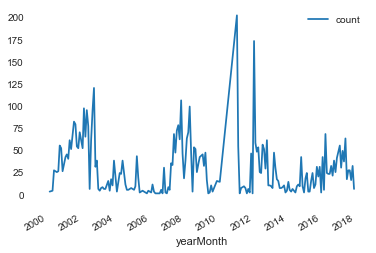

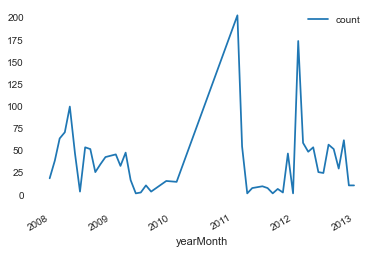

In [270]:
df_count_year_month_type[df_count_year_month_type['type']=='Agravo Interno'].plot()
#pegar apenas algo que pareça estacionario
dfARMA = df_count_year_month_type[df_count_year_month_type['type']=='Agravo Interno']
dfARMASaz = dfARMA['2008-01-01':'2013-01-01']
dfARMASaz.plot()

In [275]:
#checar se é estacionario (metodo adfuler)
#adf_teste(dfARMA['count'],'',True)
adf_teste(dfARMA['count'],'',True)

Augmented Dickey-Fuller Test: 


,0
ADF test statistic,-5.903038e+00
p-value,2.749329e-07
# lags used,1.000000e+00
# observations,1.830000e+02
critical value (1%),-3.466598e+00
critical value (5%),-2.877467e+00
critical value (10%),-2.575260e+00


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


(2.749329326465345e-07,
 '',
 -5.903037584444164,
 1,
 183,
 {'1%': -3.466598080268425,
  '5%': -2.8774669520682674,
  '10%': -2.5752604356654425},
 1613.953419501793,
 'Strong evidence against the null hypothesis \n Reject the null hypothesis \n Data has no unit root and is stationary')

In [276]:
auto_arima(dfARMA['count']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  185
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -867.638
Date:                Sat, 02 May 2020   AIC                           1747.277
Time:                        12:26:26   BIC                           1766.599
Sample:                             0   HQIC                          1755.108
                                - 185                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.3525      6.585      1.268      0.205      -4.555      21.260
ar.L1         -0.0841      0.105     -0.801      0.423      -0.290       0.122
ar.L2          0.7879      0.088      8.988      0.000       0.616       0.960
ma.L1          0.4290      1.633      0.263      0.793      -2.772       3.630
ma.L2         -0.5708      0.917     -0.622      0.534      -2.368       1.226
sigma2       684.6751   1088.402      0.629      0.529   -1448.553    2817.903
===================================================================================
Ljung-Box (Q):                       33.25   Jarque-Bera (JB):              2639.86
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             3.06
Prob(H) (two-sided):                  0.02   Kurtosis:                        20.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [317]:
dfARMA


In [335]:
print(dfARMA['count'].count())
dfARMA = dfARMA.asfreq('MS')
dfARMATrain = dfARMA[:140]
dfARMATest = dfARMA[140:]
print(dfARMA['count'].count())
dfARMA = dfARMA.fillna(0)
print(dfARMATrain.count(),dfARMATest.count())
print(dfARMATrain.index,dfARMATest.index)

214
214
type     140
count    140
dtype: int64 type     74
count    74
dtype: int64
DatetimeIndex(['2000-03-01', '2000-04-01', '2000-05-01', '2000-06-01',
               '2000-07-01', '2000-08-01', '2000-09-01', '2000-10-01',
               '2000-11-01', '2000-12-01',
               ...
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01'],
              dtype='datetime64[ns]', name='yearMonth', length=140, freq='MS') DatetimeIndex(['2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-

In [336]:
modelARMA = ARMA(dfARMATrain['count'],order=(2,0,2))
resultARMAmodel = modelARMA.fit()
resultARMAmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  140
Model:                     ARMA(2, 0)   Log Likelihood                -665.063
Method:                       css-mle   S.D. of innovations             27.952
Date:                Sat, 02 May 2020   AIC                           1338.126
Time:                        13:55:17   BIC                           1349.893
Sample:                    03-01-2000   HQIC                          1342.908
                         - 10-01-2011                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6814      5.004      4.933      0.000      14.875      34.488
ar.L1.count     0.4381      0.084      5.229      0.000       0.274       0.602
ar.L2.count     0.0940      0.084      1.120      0.263      -0.071       0.259
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6783           +0.0000j            1.6783            0.0000
AR.2           -6.3377           +0.0000j            6.3377            0.5000
-----------------------------------------------------------------------------
"""

2011-11-01    14.271632
2011-12-01    18.365099
2012-01-01    20.935895
2012-02-01    22.446877
2012-03-01    23.350455
                ...    
2017-08-01    24.681443
2017-09-01    24.681443
2017-10-01    24.681443
2017-11-01    24.681443
2017-12-01    24.681443
Freq: MS, Name: count, Length: 74, dtype: float64

DatetimeIndex(['2011-11-01', '2011-12-01', '2012-01-01', '2012-02-01',
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
      

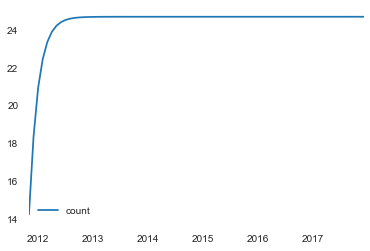

In [350]:
start = len(dfARMATrain)
end = len(dfARMATrain) + len(dfARMATest) -1
predictions = resultARMAmodel.predict(start,end).rename('count')
display(predictions)
dfPredictions = pd.DataFrame(predictions)
print(dfPredictions.index)
dfPredictions.plot()
print(dfPredictions.info())

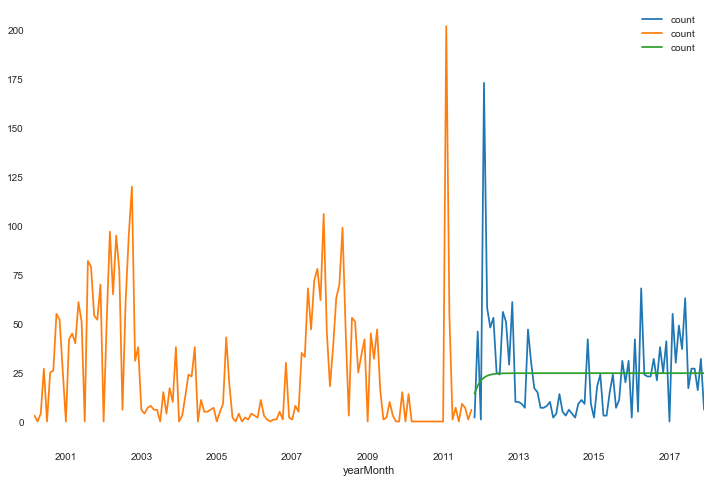

In [521]:
dfARMATest['count'].plot(figsize=(12,8),legend=True)
dfARMATrain['count'].plot(figsize=(12,8),legend=True)
dfPredictions['count'].plot(figsize=(12,8),legend=True)

#plota somente a MEDIA (prevista)

# ARIMA

<Figure size 2160x1440 with 0 Axes>

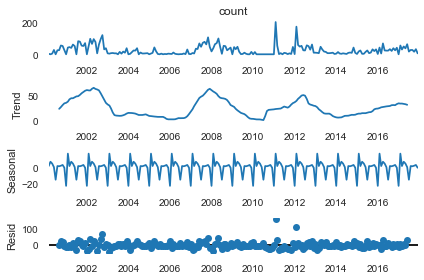

In [596]:
#df_count_year_month_type[df_count_year_month_type['type']=='Agravo Interno'].plot()
#pegar apenas algo que pareça estacionario
dfARIMA = df_count_year_month_type[df_count_year_month_type['type']=='Agravo Interno']
dfARIMA = dfARIMA.asfreq('MS')
dfARIMA = dfARIMA.fillna(0)
#dfARIMASaz = dfARMA['2008-01-01':'2013-01-01']
#dfARIMASaz.plot()

from statsmodels.tsa.seasonal import seasonal_decompose
resultARIMA = seasonal_decompose(dfARIMA['count'],model='add')
plt.figure(figsize=(30,20))
resultARIMA.plot();

In [662]:
auto_arima(dfARIMA['count'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1003.011
Date:                Sat, 02 May 2020   AIC                           2018.023
Time:                        17:10:16   BIC                           2038.219
Sample:                             0   HQIC                          2026.184
                                - 214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2666      5.857      1.241      0.215      -4.214      18.747
ar.L1         -0.1496      0.084     -1.791      0.073      -0.313       0.014
ar.L2          0.8502      0.088      9.701      0.000       0.678       1.022
ma.L1          0.4262      0.164      2.593      0.010       0.104       0.748
ma.L2         -0.5696      0.155     -3.684      0.000      -0.873      -0.267
sigma2       685.1234     79.643      8.602      0.000     529.026     841.221
===================================================================================
Ljung-Box (Q):                       63.27   Jarque-Bera (JB):              2762.18
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             2.90
Prob(H) (two-sided):                  0.94   Kurtosis:                        19.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [663]:
from statsmodels.tsa.statespace.tools import diff

In [664]:
dfARIMA['Diff_1']=diff(dfARIMA['count'],k_diff=1)

In [665]:
display(adf_teste(dfARIMA['Diff_1'],'',True))

Augmented Dickey-Fuller Test: 


,0
ADF test statistic,-5.491171
p-value,0.000002
# lags used,11.000000
# observations,201.000000
critical value (1%),-3.463309
critical value (5%),-2.876029
critical value (10%),-2.574493


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


(2.1736075620145096e-06,
 '',
 -5.491170689722824,
 11,
 201,
 {'1%': -3.4633090972761744,
  '5%': -2.876029332045744,
  '10%': -2.5744932593252643},
 1860.4254355280827,
 'Strong evidence against the null hypothesis \n Reject the null hypothesis \n Data has no unit root and is stationary')

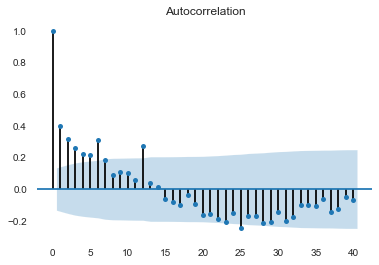

In [666]:
plot_acf(dfARIMA['count'],lags=40);

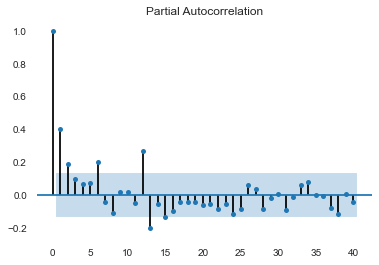

In [667]:
plot_pacf(dfARIMA['count'],lags=40);

In [668]:
stepwise_fit_arima = auto_arima(dfARIMA['count'],start_p=0,start_q=0, max_p=4, max_q=2, seasonal=True, trace=False)
stepwise_fit_arima.summary()
                            

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1003.011
Date:                Sat, 02 May 2020   AIC                           2018.023
Time:                        17:10:18   BIC                           2038.219
Sample:                             0   HQIC                          2026.184
                                - 214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2666      5.857      1.241      0.215      -4.214      18.747
ar.L1         -0.1496      0.084     -1.791      0.073      -0.313       0.014
ar.L2          0.8502      0.088      9.701      0.000       0.678       1.022
ma.L1          0.4262      0.164      2.593      0.010       0.104       0.748
ma.L2         -0.5696      0.155     -3.684      0.000      -0.873      -0.267
sigma2       685.1234     79.643      8.602      0.000     529.026     841.221
===================================================================================
Ljung-Box (Q):                       63.27   Jarque-Bera (JB):              2762.18
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             2.90
Prob(H) (two-sided):                  0.94   Kurtosis:                        19.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [669]:
len((dfARIMA))

214

In [670]:
dfARIMATrain= dfARIMA[:149]
dfARIMATest= dfARIMA[149:]

In [671]:
modelARIMA = ARIMA(dfARIMATrain['count'],order=(2,0,2))

In [672]:
resultsModelARIMA = modelARIMA.fit()
resultsModelARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  count   No. Observations:                  149
Model:                     ARMA(2, 2)   Log Likelihood                -717.811
Method:                       css-mle   S.D. of innovations             29.889
Date:                Sat, 02 May 2020   AIC                           1447.623
Time:                        17:10:22   BIC                           1465.646
Sample:                    03-01-2000   HQIC                          1454.946
                         - 07-01-2012                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          26.2502      6.858      3.828      0.000      12.810      39.691
ar.L1.count     0.7998      1.137      0.703      0.482      -1.429       3.028
ar.L2.count     0.0644      0.965      0.067      0.947      -1.826       1.955
ma.L1.count    -0.4756      1.130     -0.421      0.674      -2.690       1.739
ma.L2.count    -0.1318      0.652     -0.202      0.840      -1.410       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1448           +0.0000j            1.1448            0.0000
AR.2          -13.5545           +0.0000j           13.5545            0.5000
MA.1            1.4885           +0.0000j            1.4885            0.0000
MA.2           -5.0980           +0.0000j            5.0980            0.5000
-----------------------------------------------------------------------------
"""

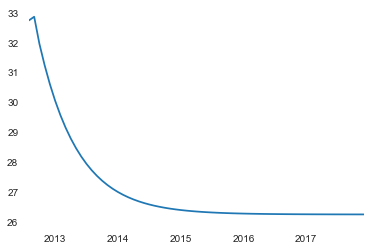

In [673]:
start= len(dfARIMATrain)
end = len(dfARIMATrain)+len(dfARIMATest)-1
predictionModelArima = resultsModelARIMA.predict(start=start,end=end,typ='levels').rename('ARIMA')
predictionModelArima.plot()

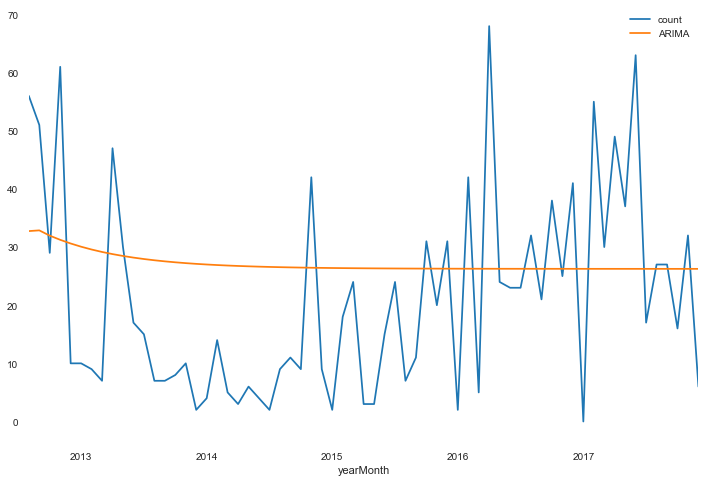

In [674]:
dfARIMATest['count'].plot(legend=True,figsize=(12,8))
predictionModelArima.plot(legend=True)

In [675]:
error = rmse(dfARIMATest['count'],predictionModelArima)
error

18.04883835978826

In [676]:
dfARIMATest['count'].mean()

21.323076923076922

In [677]:
predictionModelArima.mean()

27.147605908565748

In [678]:
modelArimaForecast = ARIMA(dfARIMA['count'],order=(2,0,2))
resultArimaForecast = modelArimaForecast.fit()

In [679]:
fcast = resultArimaForecast.predict(start=len(dfARIMA),end=len(dfARIMA)+18,typ='levels')

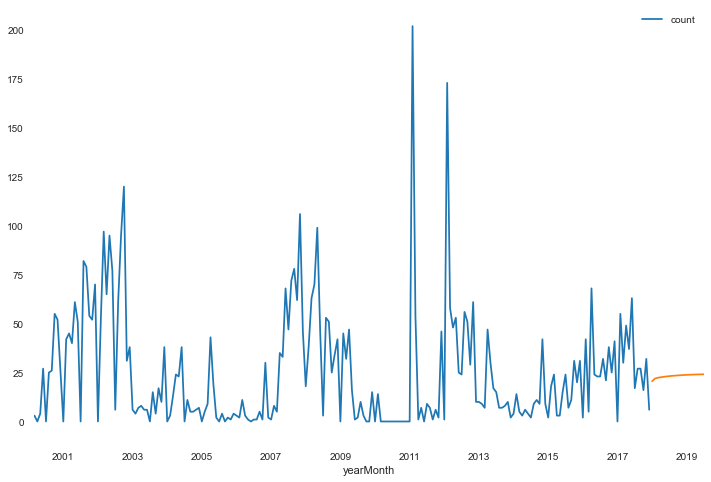

In [680]:
dfARIMA['count'].plot(legend=True,figsize=(12,8))
fcast.plot()

<hr>

# SARIMA

<hr>

In [723]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX
from statsmodels.tsa.seasonal  import seasonal_decompose
from pmdarima import auto_arima

dfSARIMA = df_count_year_month_type[df_count_year_month_type['type']=='Agravo Interno']['2008-01-01':]
dfSARIMA = dfSARIMA.asfreq('MS')
dfSARIMA = dfSARIMA.fillna(dfSARIMA['count'].mean())


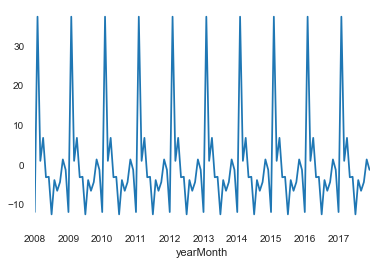

In [724]:
resultSarima = seasonal_decompose(dfSARIMA['count'])
resultSarima.seasonal.plot();

In [740]:
auto_arima(dfSARIMA['count'],seasonal=True,m=36).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -566.240
Date:                Sat, 02 May 2020   AIC                           1140.481
Time:                        17:51:02   BIC                           1151.631
Sample:                             0   HQIC                          1145.009
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.8299     10.182      0.867      0.386     -11.126      28.786
ar.L1          0.6781      0.343      1.976      0.048       0.005       1.351
ma.L1         -0.4803      0.453     -1.060      0.289      -1.368       0.407
sigma2       734.1500     51.771     14.181      0.000     632.681     835.619
===================================================================================
Ljung-Box (Q):                       26.86   Jarque-Bera (JB):              2281.43
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                             3.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [741]:
lev = dfSARIMA['count'].count()-((dfSARIMA['count'].count()*30)/100)
print(int(lev))

dfSARIMATrain= dfSARIMA[:int(lev)]
dfSARIMATest = dfSARIMA[int(lev):]
#print(dfSARIMATrain.count(),dfSARIMATest.count())

84


In [742]:
modelSarima = SARIMAX(dfSARIMATrain['count'],order=(1,0,1),seasonal_order=(0,0,1,12))
resultsSarima = modelSarima.fit()
resultsSarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              count   No. Observations:                   84
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -406.853
Date:                            Sat, 02 May 2020   AIC                            821.706
Time:                                    17:51:27   BIC                            831.430
Sample:                                01-01-2008   HQIC                           825.615
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9249      0.082     11.345      0.000       0.765       1.085
ma.L1         -0.6501      0.185     -3.513      0.000      -1.013      -0.287
ma.S.L12       0.3363      0.049      6.923      0.000       0.241       0.431
sigma2       917.2622     59.264     15.478      0.000     801.108    1033.417
===================================================================================
Ljung-Box (Q):                       19.36   Jarque-Bera (JB):               792.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             2.67
Prob(H) (two-sided):                  0.49   Kurtosis:                        17.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

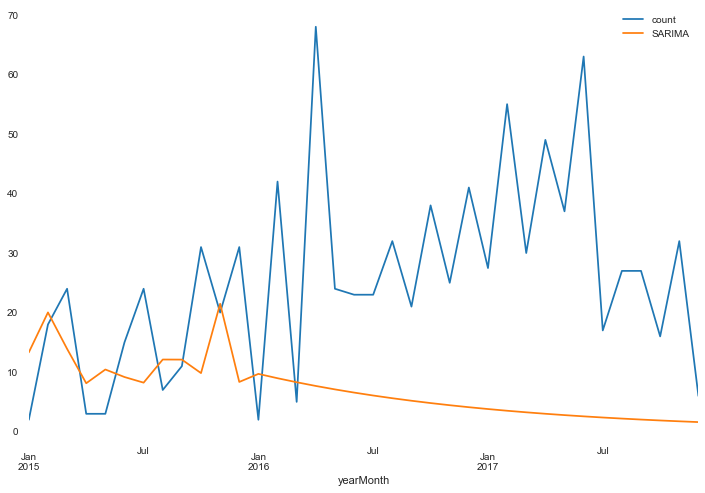

In [743]:
start = len(dfSARIMATrain)
end = len(dfSARIMATrain) +len(dfSARIMATest) -1
predictionsSarima = resultsSarima.predict(start=start,end=end,typ='levels').rename('SARIMA')
dfSARIMATest['count'].plot(figsize=(12,8),legend=True)
predictionsSarima.plot(legend=True)

In [744]:
from statsmodels.tools.eval_measures import rmse
error = rmse(dfSARIMATest['count'],predictionsSarima)
error

26.09435162996807

In [745]:
dfSARIMATest['count'].mean()

25.54099244875944


<div class="alert alert-info"><h2> SARIMA
</h2>
        <hr/>
    
</div>


<div class="alert alert-info"><h2> VAR - Vector Autoregression
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> VARMA - Vector Autoregression Moving Average
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> Deep learning - LSTMS - GRU 
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> RNN
</h2>
    <hr/>
    
</div>


<div class="alert alert-info"><h2> Facebook Prophet Library
</h2>
    <hr/>
    
</div>


<div class="alert alert-danger"><h2> Clustering - Não está legal, não sei exatamente o que clusterizar
</h2>
    <hr/>
    
</div>

In [364]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [354]:
num_samples = 61
group_size = 10

,yearMonth,type,count
0,2000-01-01,Agravo de Instrumento,12
1,2000-02-01,Agravo de Instrumento,35
2,2000-03-01,Agravo de Instrumento,93


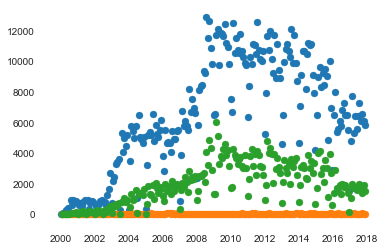

In [378]:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
#print(X.shape)  # 150 samples with 2 dimensions
#plt.scatter(X[:,0], X[:,1])
#plt.show()

dfA = df_count_year_month_type[df_count_year_month_type['type']=='Agravo de Instrumento'].reset_index().sort_values('yearMonth')
dfB = df_count_year_month_type[df_count_year_month_type['type']=='Ação Rescisória'].reset_index().sort_values('yearMonth')
dfC = df_count_year_month_type[df_count_year_month_type['type']=='Agravo'].reset_index().sort_values('yearMonth')

display(dfA.head(3))
plt.scatter(dfA['yearMonth'],dfA['count'],label=True)
plt.scatter(dfB['yearMonth'],dfB['count'],label=True)
plt.scatter(dfC['yearMonth'],dfC['count'],label=True)
plt.show()


In [515]:
df_count_year_month_type.head(3)

,type,count
yearMonth,,
2000-01-01,Agravo de Instrumento,12
2000-02-01,Ação Rescisória,1
2000-02-01,Agravo,4


In [400]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [401]:
def get_distances(X,model,mode='l2'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='l2':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

<Figure size 1440x960 with 0 Axes>

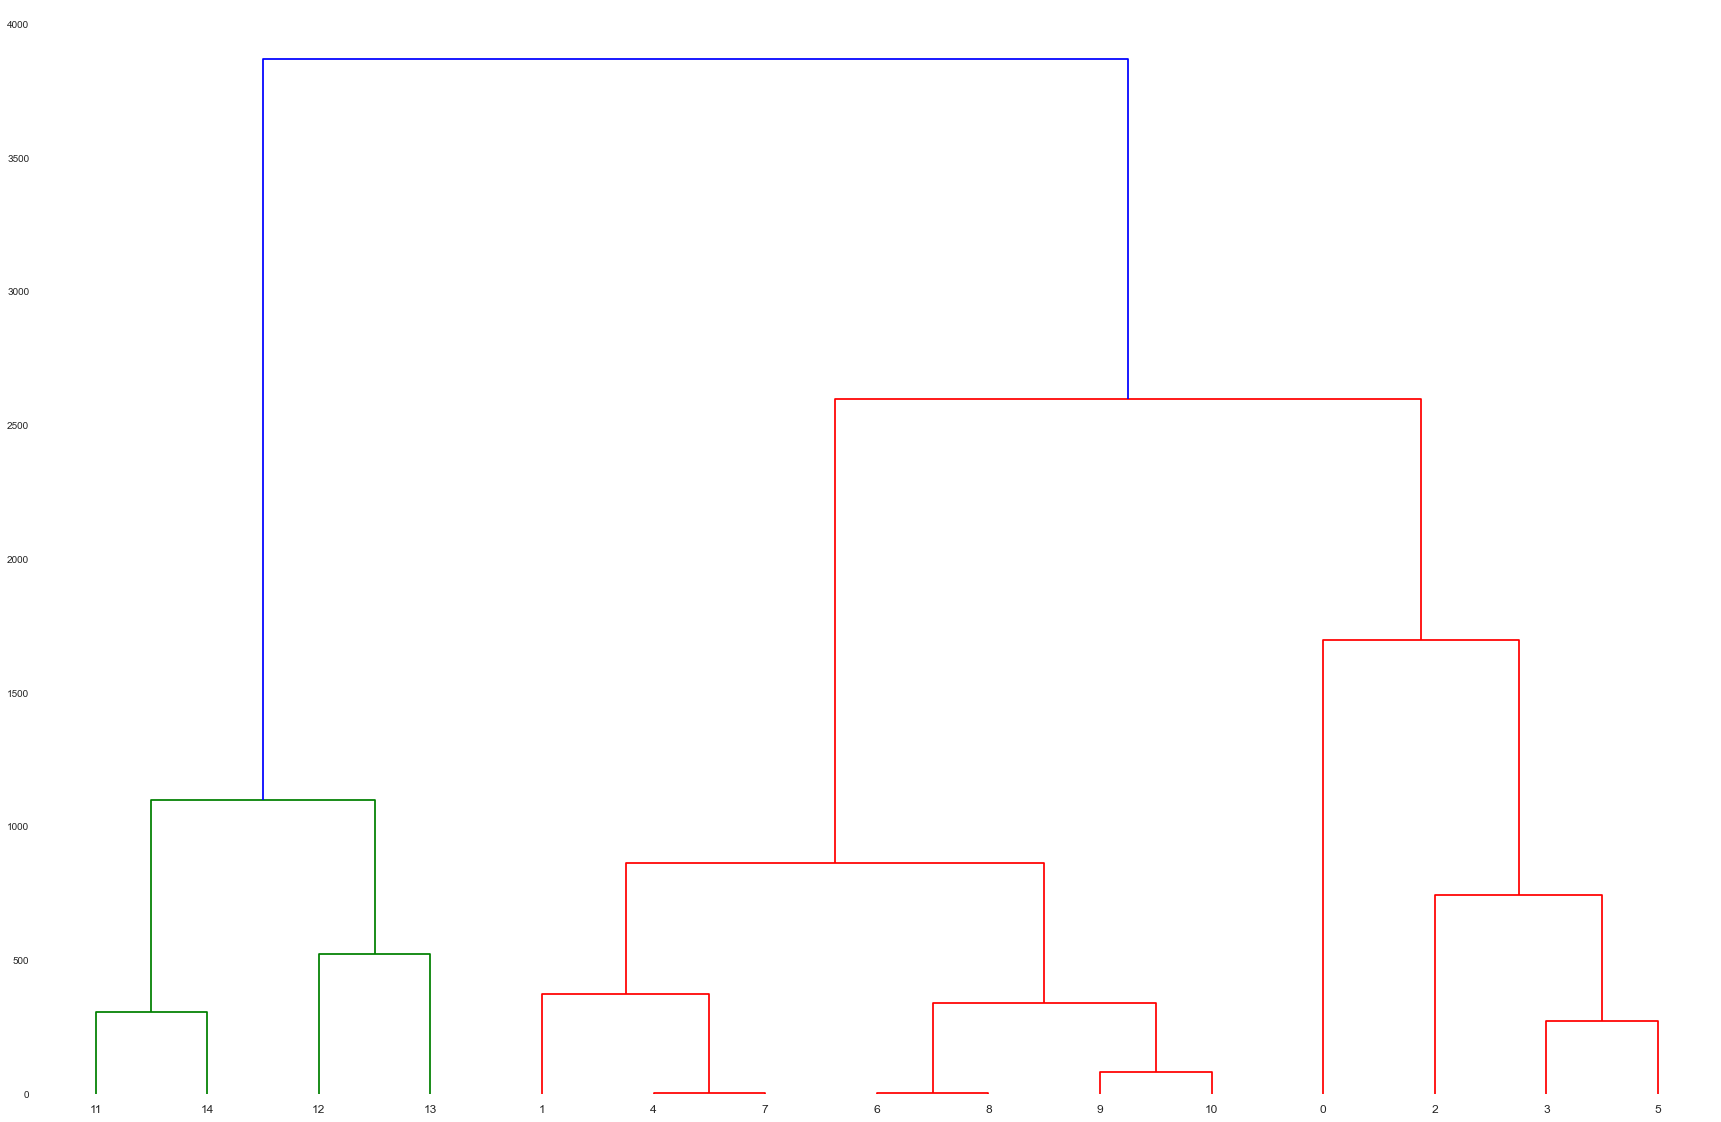

In [513]:
import matplotlib.cm as cm
from matplotlib.pyplot import figure

figure(num=None, figsize=(18, 12), dpi=80, facecolor='w', edgecolor='k')
listtt=[]

for i in dfTypes.unique()[0:3]:    
    dfFf = df_count_year_month_type[df_count_year_month_type['type'] == i]['2017-08-01':].reset_index().sort_values('yearMonth')
    listtt.append(np.array(dfFf[['yearMonth','count']]).tolist())
    
X = np.vstack(listtt)
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(X)))
#plt.scatter(X[:,0],X[:,1],color=colors)

xNum = np.arange(0,len(X))
xNum
Y= X

for i in xNum:
    #print(Y[i,0])
    Y[i,0] = i

model = AgglomerativeClustering(n_clusters=8,linkage="ward")
model.fit(Y)

distance, weight = get_distances(Y,model)
linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)
plt.figure(figsize=(30,20))
dendrogram(linkage_matrix,)
plt.show()